# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

132. Import and inspect the cars dataset (cars.csv)!

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [22]:
cars = pd.read_csv("cars.csv")

In [23]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [24]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [25]:
# MY ATTEMPT
#cars["FullFormat"] = "19"
#cars.model_year.map()
#cars.FullFormat = cars.FullFormat.add(cars.model_year.astype("str"))
#cars

# BETTER ATTEMPT
cars.model_year = cars.model_year.add(1900)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger


In [27]:
cars.model_year.value_counts() # Confirm

1973    40
1978    36
1976    34
1982    31
1975    30
1981    29
1980    29
1979    29
1970    29
1977    28
1972    28
1971    28
1974    27
Name: model_year, dtype: int64

134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

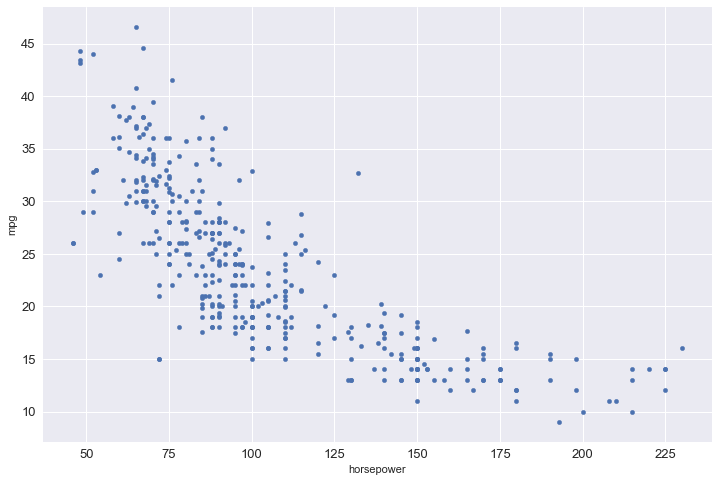

In [28]:
cars.plot(kind = "scatter", x = "horsepower", y = "mpg", figsize= (12, 8), fontsize= 13)
plt.show()

In [32]:
# Gallons per 100 miles is OPPOSITE of miles per gallon!!!
cars["gpm"] = (1/cars.mpg*100).round(2)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88


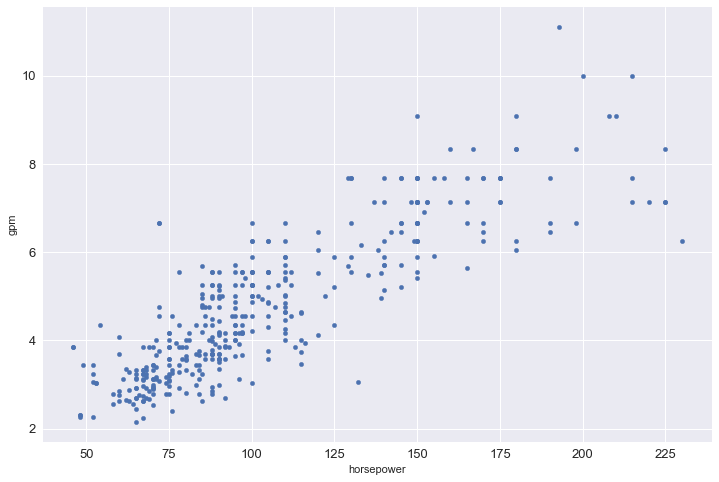

In [31]:
cars.plot(kind = "scatter", x = "horsepower", y = "gpm", figsize= (12, 8), fontsize= 13)
plt.show()

135. Create a __new column__ with the __manufacturer__ name!

In [36]:
cars["manufacturer"] = cars.name.str.split(" ", n=1, expand=True)[0]
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford


136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [37]:
cars.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [38]:
mapper = {"usa":"north america","japan":"asia","europe":"europe"}

In [40]:
#cars.origin.map(mapper)
cars["Continent"] = cars.origin.map(mapper)

In [43]:
cars.Continent.value_counts()

north america    249
asia              79
europe            70
Name: Continent, dtype: int64

137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

In [52]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,gpm
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050,4.767211
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,1.658479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,2.150000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,1973.000000,3.450000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000,4.350000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,1979.000000,5.710000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,11.110000


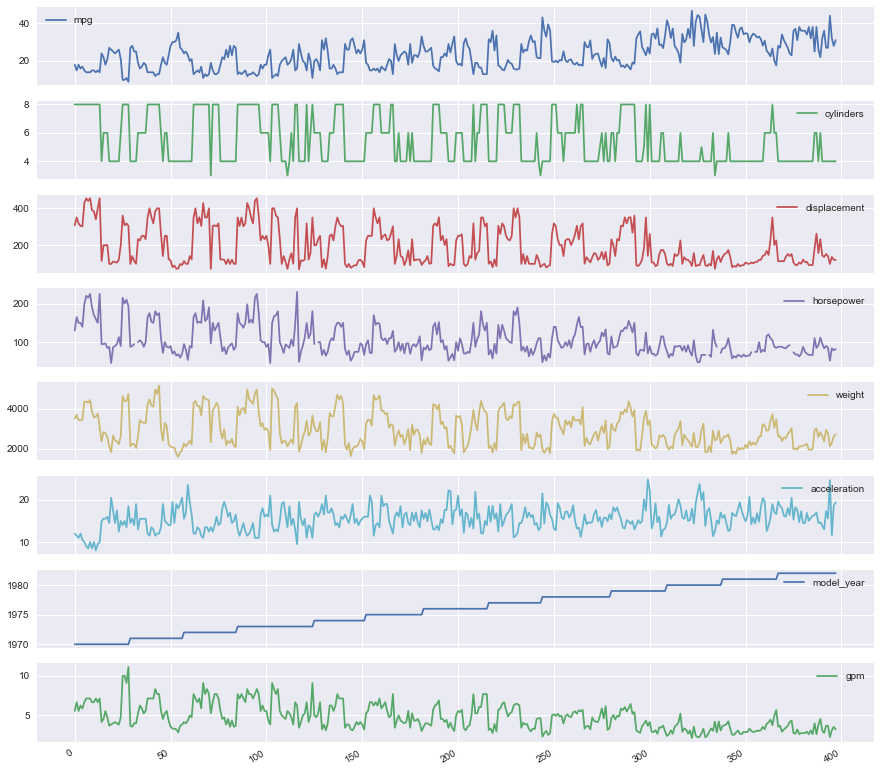

In [51]:
# Nothing is CLEARLY an outlier yet. We need to use bins to make sure!
cars.plot(figsize = (15,15), subplots=True)
plt.show()

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

In [53]:
pd.qcut(x=cars.weight, q=[0, 0.25, 0.75, 1], precision = 2)

0       (2223.75, 3608.0]
1        (3608.0, 5140.0]
2       (2223.75, 3608.0]
3       (2223.75, 3608.0]
4       (2223.75, 3608.0]
              ...        
393     (2223.75, 3608.0]
394    (1612.99, 2223.75]
395     (2223.75, 3608.0]
396     (2223.75, 3608.0]
397     (2223.75, 3608.0]
Name: weight, Length: 398, dtype: category
Categories (3, interval[float64]): [(1612.99, 2223.75] < (2223.75, 3608.0] < (3608.0, 5140.0]]

In [54]:
weight_labels = ["light", "medium", "heavy"]

In [55]:
cars["weight_category"] = pd.qcut(x=cars.weight, q=[0, 0.25, 0.75, 1], precision = 2, labels=weight_labels)

In [57]:
cars.weight_category.value_counts() # Weight is NOT a category with outliers!

medium    198
heavy     100
light     100
Name: weight_category, dtype: int64

139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [71]:
# For this specific analysis, we are not using these columns!
cars.drop(axis=1, columns=["cylinders","displacement","weight","acceleration","name","mpg"], inplace=True)

140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

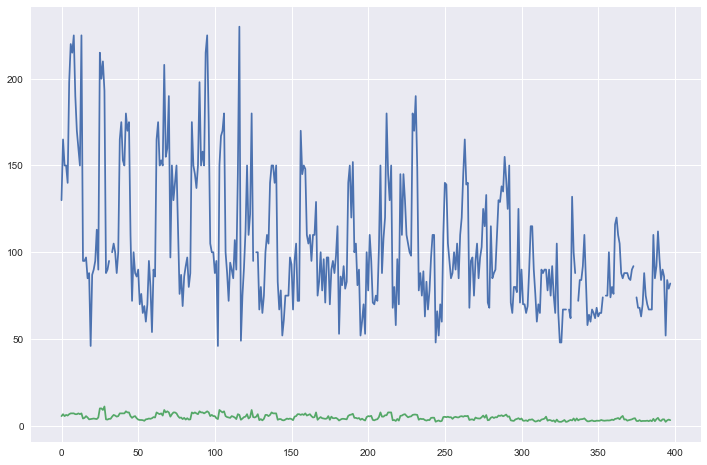

In [86]:
cars.horsepower.plot(figsize = (12,8)) # OR cars.loc[:, ["horsepower", "gpm"]].plot(figsize = (12,8))
cars.gpm.plot(figsize = (12,8))
plt.show()

In [73]:
# Z-Score: ([number]-mean)/std
mean_hp = cars.horsepower.mean() # 104.469
mean_gpm = cars.gpm.mean() # 4.767

In [74]:
std_hp = cars.horsepower.std() # 38.491
std_gpm = cars.gpm.std() # 1.658

In [77]:
cars["z_hp"] = round((cars.horsepower - mean_hp)/std_hp,2)
cars["z_gpm"] = round((cars.gpm - mean_gpm)/std_gpm,2)

In [78]:
cars.head() # At this point, make sure those columns were deleted, i.e., inplace=True

,horsepower,model_year,origin,gpm,manufacturer,Continent,weight_category,z_hp,z_gpm
0,130.0,1970,usa,5.56,chevrolet,north america,medium,0.66,0.48
1,165.0,1970,usa,6.67,buick,north america,heavy,1.57,1.15
2,150.0,1970,usa,5.56,plymouth,north america,medium,1.18,0.48
3,150.0,1970,usa,6.25,amc,north america,medium,1.18,0.89
4,140.0,1970,usa,5.88,ford,north america,medium,0.92,0.67


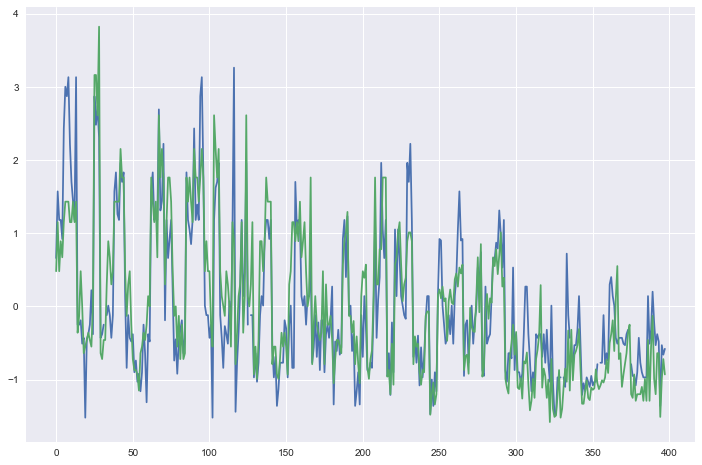

In [79]:
cars.z_hp.plot(figsize = (12,8))
cars.z_gpm.plot(figsize = (12,8))
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [88]:
cars = pd.get_dummies(cars, columns = ["model_year", "origin"], drop_first = True)

,horsepower,gpm,manufacturer,Continent,weight_category,z_hp,z_gpm,model_year_1971,model_year_1972,model_year_1973,...,model_year_1975,model_year_1976,model_year_1977,model_year_1978,model_year_1979,model_year_1980,model_year_1981,model_year_1982,origin_japan,origin_usa
0,130.0,5.56,chevrolet,north america,medium,0.66,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,165.0,6.67,buick,north america,heavy,1.57,1.15,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,5.56,plymouth,north america,medium,1.18,0.48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150.0,6.25,amc,north america,medium,1.18,0.89,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140.0,5.88,ford,north america,medium,0.92,0.67,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86.0,3.70,ford,north america,medium,-0.48,-0.64,0,0,0,...,0,0,0,0,0,0,0,1,0,1
394,52.0,2.27,vw,europe,light,-1.36,-1.51,0,0,0,...,0,0,0,0,0,0,0,1,0,0
395,84.0,3.12,dodge,north america,medium,-0.53,-0.99,0,0,0,...,0,0,0,0,0,0,0,1,0,1
396,79.0,3.57,ford,north america,medium,-0.66,-0.72,0,0,0,...,0,0,0,0,0,0,0,1,0,1


-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True